<td>
   <a target="_blank" href="https://www.clarifai.com/" ><img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Clarifai_Logo_FC_Web.png" width=256/></a>
</td>

<td>
<a href="https://colab.research.google.com/github/Clarifai/examples/blob/main/models/model_train/image-classification_training.ipynb" target="_blank"><img
src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"></a>
</td>

# Models



Clarifai offers a range of powerful model types, each designed to generate meaningful outputs based on user specific inputs and AI tasks.

There are wide variety of models that can be used as standalone solutions, or as building blocks for your own custom business solutions.


Clarifai Models are the recommended starting points for many users because they offer incredibly fast training times when you customize them using the "embedding-classifier" (Transfer Learning Classifier) model type.

But there are many cases where accuracy and the ability to carefully target solutions take priority over speed and ease of use. Additionally, you may need a model to learn new features, not recognized by existing Clarifai Models. For these cases, it is possible to "deep fine-tune" your custom models and integrate them directly within your workflows.

You might consider deep training if you have:

- A custom tailored dataset
- Accurate labels
- Expertise and time to fine-tune models


_______
On the [Clarifai Community](https://clarifai.com/explore) explore page, you can click the [Models](https://clarifai.com/explore/models) tab to search and access the models available for everyone to use. 

This notebook contains Model Train demo for **visual-classifier** Model Type with **MMClassification_EfficientNet** Template.

# Getting Started

### Installation

In [ ]:
! pip install -U clarifai

In [1]:
import os
os.environ["CLARIFAI_PAT"] = "YOUR_PAT" # replace with your own PAT key here

*Note: Guide to get your [PAT](https://docs.clarifai.com/clarifai-basics/authentication/personal-access-tokens)*

### For Colab
To access data files from Clarifai examples repo, you can clone the repo

In [ ]:
!git clone https://github.com/Clarifai/examples.git
%cd /content/examples/models/model_train

### For local

In [ ]:
git clone https://github.com/Clarifai/examples.git
cd examples/models/model_train

## VISUAL-CLASSIFIER

**Input: Images and videos**

**Output: Concepts**

Visual classifier is a type of deep fine-tuned model that allows you to classify images and video frames into a set of concepts.

### Creating an App

In [2]:
from clarifai.client.user import User
#replace your "user_id"
client = User(user_id="user_id")

In [ ]:
app = client.create_app(app_id="demo_train", base_workflow="Universal")

### Uploading Image Classification Dataset

In [ ]:
module_path = os.path.join(os.getcwd().split('/models/model_train')[0],'datasets/upload/image_classification/food-101')
module_path

In [7]:
#importing load_module_dataloader for calling the dataloader object in dataset.py in the local data folder
from clarifai.datasets.upload.utils import load_module_dataloader

In [8]:
food101_dataloader = load_module_dataloader(module_path)

In [9]:
dataset = app.create_dataset(dataset_id="image_dataset")
dataset.upload_dataset(dataloader=food101_dataloader,get_upload_status=True)

2023-11-29 12:16:49 INFO     INFO:clarifai.client.app:                                                   ]8;id=236048;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/app.py\app.py]8;;\:]8;id=392146;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/app.py#310\310]8;;\
                             Dataset created                                                                       
                             code: SUCCESS                                                                         
                             description: "Ok"                                                                     
                             req_id: "74f2ef52959c8b13bc58d4e7b2e912ee"                                            
                                                                                                                   

Uploading Dataset: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.58s/it]


2023-11-29 12:17:07 INFO     INFO:clarifai:Getting dataset upload status...                          ]8;id=847164;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py\dataset.py]8;;\:]8;id=614763;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py#420\420]8;;\

                    INFO     INFO:clarifai:                                                           ]8;id=214488;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py\dataset.py]8;;\:]8;id=429131;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py#96\96]8;;\
                             Dataset Version created                                                               
                             code: SUCCESS                                                                         
                             description: "Ok"                                                                     
                             req_id: "13df4684b3dc6f1a37b48fbc1af4acd2"                                            
                                                                                                                   

2023-11-29 12:17:08 INFO     INFO:clarifai:Crunching the dataset metrics. Please wait...             ]8;id=574203;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py\dataset.py]8;;\:]8;id=598765;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py#444\444]8;;\

                    INFO     INFO:clarifai:Crunching the dataset metrics. Please wait...             ]8;id=995698;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py\dataset.py]8;;\:]8;id=824696;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py#444\444]8;;\

2023-11-29 12:17:09 INFO     INFO:clarifai:Crunching the dataset metrics. Please wait...             ]8;id=390550;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py\dataset.py]8;;\:]8;id=224799;file:///Users/sanjay/virtualenv/v1/lib/python3.9/site-packages/clarifai/client/dataset.py#444\444]8;;\

╭────────────────────────────────────────────  Dataset Upload Summary ────────────────────────────────────────────╮
│ Inputs Progress:      ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% │
│ Annotations Progress: ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓                                                                 │
│ ┃ dataset_id    ┃ user_id        ┃ app_id     ┃                                                                 │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩                                                                 │
│ │ image_dataset │ sanjaychelliah │ demo_train │                                                                 │
│ └───────────────┴────────────────┴────────────┘                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────  Dataset Metrics Comparison ──────────────────────────────────────────╮
│                      Local Dataset                                         Uploaded Dataset                     │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ │
│ ┃ Inputs Count ┃ Annotations Count                    ┃┃ Inputs Count ┃ Annotations Count                     ┃ │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ │
│ │ 20           │ {'concepts': 20, 'bboxes': 0,        ││ 20           │ {'concepts': 20, 'bboxes': 0,         │ │
│ │              │ 'polygons': 0}                       ││              │ 'polygons': 0}                        │ │
│ └──────────────┴──────────────────────────────────────┘└──────────────┴───────────────────────────────────────┘ │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### List Trainable Model Types
Listing all the trainable Model Types in the Clarifai Platform.

In [5]:
app.list_trainable_model_types()

['visual-classifier',
 'visual-detector',
 'visual-segmenter',
 'visual-embedder',
 'clusterer',
 'text-classifier',
 'embedding-classifier',
 'text-to-text']

### Create a Model

In [ ]:
MODEL_ID = "model_classifier"
MODEL_TYPE_ID = "visual-classifier"
model = app.create_model(model_id=MODEL_ID, model_type_id=MODEL_TYPE_ID)

### List Templates for the Model Type

Templates give you the control to choose the specific architecture used by your neural network, as well as define a set of hyperparameters you can use to fine-tune the way your model learns.

In [7]:
model.list_training_templates()

['Clarifai_InceptionBatchNorm',
 'Clarifai_InceptionTransferEmbedNorm',
 'Clarifai_InceptionV2',
 'Clarifai_ResNext',
 'MMClassification_AdvancedConfig',
 'MMClassification_EfficientNet',
 'MMClassification_ResNet_50',
 'MMClassification_ResNet_50_RSB_A1',
 'classification_basemodel_v1',
 'classification_cifar10_v1',
 'classification_inception_general_v1_3_transfer_embednorm']

### Save params
Save the parameters for the specific model template in a YAML file

In [41]:
YAML_FILE = 'mmclassification_efficientnet.yaml'
model_params = model.get_params(template='MMClassification_EfficientNet', save_to=YAML_FILE)

In [42]:
# Preview YAML content
import yaml
file = open(YAML_FILE)
data = yaml.safe_load(file)
data

{'dataset_id': '',
 'dataset_version_id': '',
 'concepts': [],
 'train_params': {'invalid_data_tolerance_percent': 5.0,
  'template': 'MMClassification_EfficientNet',
  'seed': -1.0,
  'num_gpus': 1.0,
  'image_size': 336.0,
  'batch_size': 4.0,
  'num_epochs': 30.0,
  'per_item_lrate': 0.000390625,
  'weight_decay': 0.0001,
  'momentum': 0.9,
  'pretrained_weights': 'ImageNet-1k',
  'flip_probability': 0.5,
  'flip_direction': 'horizontal',
  'concepts_mutually_exclusive': False},
 'inference_params': {'select_concepts': []}}

#### Get param info

In [ ]:
print(model.get_param_info(param = 'dataset_id'))

### Edit the parameters in the YAML file to pass it to model.train()
**Here using the already edited and saved YAML file**

In [44]:
# Preview YAML content
file = open('saved_mmclassification_efficientnet.yaml')
data = yaml.safe_load(file)
data

{'dataset_id': 'image_dataset',
 'dataset_version_id': '',
 'concepts': ['id-ramen', 'id-prime_rib', 'id-hamburger', 'id-beignets'],
 'train_params': {'invalid_data_tolerance_percent': 5.0,
  'template': 'MMClassification_EfficientNet',
  'seed': -1.0,
  'num_gpus': 1.0,
  'image_size': 336.0,
  'batch_size': 4.0,
  'num_epochs': 10.0,
  'per_item_lrate': 0.000390625,
  'weight_decay': 0.0001,
  'momentum': 0.9,
  'pretrained_weights': 'ImageNet-1k',
  'flip_probability': 0.5,
  'flip_direction': 'horizontal',
  'concepts_mutually_exclusive': False},
 'inference_params': {'select_concepts': []}}

### Start Model Training

In [ ]:
model_version_id = model.train(yaml_file='saved_mmclassification_efficientnet.yaml')

### Check Model Training Status
Note: If the status code is 'MODEL_TRAINED', then the user can know the Model is Trained and ready to use.

In [51]:
#To store training logs in a file, fix training_logs param as True
status = model.training_status(version_id=model_version_id,training_logs=False)
print(status)

code: MODEL_TRAINED
description: "Model is trained and ready"



## Model Prediction
Predicting with the Trained Model.
Note: Refer this [notebook](https://github.com/Clarifai/examples/blob/main/models/model_predict.ipynb) for more info on Model Predict

In [52]:
IMAGE_PATH = os.path.join(os.getcwd().split('/models')[0],'datasets/upload/image_classification/food-101/images/hamburger/139558.jpg')
model_prediction = model.predict_by_filepath(IMAGE_PATH, input_type="image")

# Get the output
print(model_prediction.outputs[0].data)

concepts {
  id: "id-hamburger"
  name: "hamburger"
  value: 0.638404727
  app_id: "demo_train"
}
concepts {
  id: "id-ramen"
  name: "ramen"
  value: 0.453112751
  app_id: "demo_train"
}
concepts {
  id: "id-prime_rib"
  name: "prime_rib"
  value: 0.444083214
  app_id: "demo_train"
}
concepts {
  id: "id-beignets"
  name: "beignets"
  value: 0.419900149
  app_id: "demo_train"
}



id-hamburger : 0.64
id-ramen : 0.45
id-prime_rib : 0.44
id-beignets : 0.42


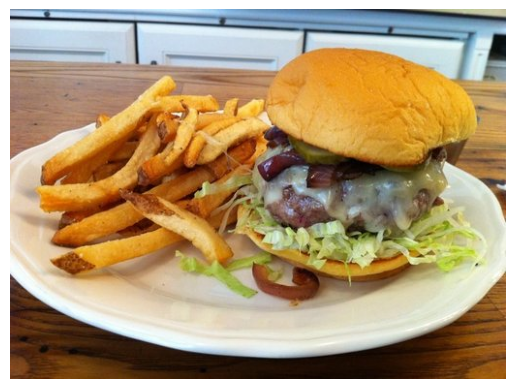

In [53]:
import cv2
import matplotlib.pyplot as plt
img = plt.imread(IMAGE_PATH)
plt.axis('off')
plt.imshow(img)
for concept in model_prediction.outputs[0].data.concepts:
    print(concept.id,':',round(concept.value,2))

## Note

- This Notebook is a demo to get started with Model Training in Clarifai Platform with Python SDK.
- For better accuracy of the Model, Choose your own data and different Templates and Hyperparams.

## Clarifai Resources

**Website**: [https://www.clarifai.com](https://www.clarifai.com/)

**Demo**: [https://clarifai.com/demo](https://clarifai.com/demo)

**Sign up for a free Account**: [https://clarifai.com/signup](https://clarifai.com/signup)

**Developer Guide**: [https://docs.clarifai.com](https://docs.clarifai.com/)

**Clarifai Community**: [https://clarifai.com/explore](https://clarifai.com/explore)

**Python SDK Docs**: [https://docs.clarifai.com/python-sdk/api-reference](https://docs.clarifai.com/python-sdk/api-reference)

---